In [1]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [2]:
"""

https://help.aliyun.com/document_detail/159212.html
人体检测
人体检测可以检测图像中的所有人体，并返回每个人体的矩形框位置

"""

from aliyunsdkfacebody.request.v20191230.PedestrianDetectAttributeRequest import PedestrianDetectAttributeRequest

request = PedestrianDetectAttributeRequest()
request.set_accept_format('json')

filepath="images/人体2.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': '6DC6B7BD-2F05-52FE-AE06-839994BA7B0F', 'Data': {'PersonNumber': 1, 'Attributes': [{'LowerWear': {'Score': 0.9879701137542725, 'Name': 'Trousers'}, 'Backpack': {'Score': 0.9958775234408677, 'Name': 'No'}, 'Orient': {'Score': 0.9238302707672119, 'Name': 'Front'}, 'ShoulderBag': {'Score': 0.9718729630112648, 'Name': 'No'}, 'LowerColor': {'Score': 0.9484567046165466, 'Name': '灰'}, 'Glasses': {'Score': 0.9050891995429993, 'Name': 'No'}, 'UpperColor': {'Score': 0.9810379147529602, 'Name': '灰'}, 'Hat': {'Score': 0.9613198824226856, 'Name': 'No'}, 'Handbag': {'Score': 0.9156140983104706, 'Name': 'No'}, 'Gender': {'Score': 0.9929098449647427, 'Name': 'male'}, 'Age': {'Score': 0.986446738243103, 'Name': 'Age18-60'}, 'UpperWear': {'Score': 0.9987271428108215, 'Name': 'LongSleeve'}}], 'Height': 800, 'Width': 533, 'Boxes': [{'Score': 0.907412052154541, 'BottomRightY': 799.0, 'BottomRightX': 418.0, 'TopLeftY': 44.0, 'TopLeftX': 208.0}]}}


In [3]:
PersonNumber=response['Data']['PersonNumber']
PersonNumber

1

In [7]:
Height=response['Data']["Height"]
Width=response['Data']["Width"]

In [18]:
TopLeft=(int(response['Data']['Boxes'][0]['TopLeftX']),int(response['Data']['Boxes'][0]['TopLeftY']))
BottomRight=(int(response['Data']['Boxes'][0]['BottomRightX']),int(response['Data']['Boxes'][0]['BottomRightY']))

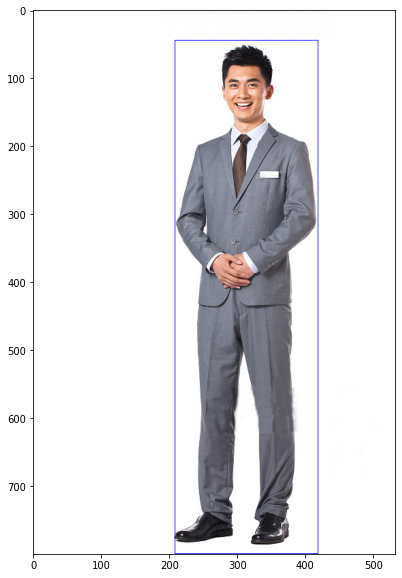

In [20]:
# left, top, right, bottom
plt.figure(figsize=(12,10))
res=plt.imread(filepath)
res=cv2.rectangle(res,TopLeft,BottomRight,(0,0,255),1)
plt.imshow(res)

In [23]:
response['Data']['Attributes']

[{'LowerWear': {'Score': 0.9879701137542725, 'Name': 'Trousers'},
  'Backpack': {'Score': 0.9958775234408677, 'Name': 'No'},
  'Orient': {'Score': 0.9238302707672119, 'Name': 'Front'},
  'ShoulderBag': {'Score': 0.9718729630112648, 'Name': 'No'},
  'LowerColor': {'Score': 0.9484567046165466, 'Name': '灰'},
  'Glasses': {'Score': 0.9050891995429993, 'Name': 'No'},
  'UpperColor': {'Score': 0.9810379147529602, 'Name': '灰'},
  'Hat': {'Score': 0.9613198824226856, 'Name': 'No'},
  'Handbag': {'Score': 0.9156140983104706, 'Name': 'No'},
  'Gender': {'Score': 0.9929098449647427, 'Name': 'male'},
  'Age': {'Score': 0.986446738243103, 'Name': 'Age18-60'},
  'UpperWear': {'Score': 0.9987271428108215, 'Name': 'LongSleeve'}}]